# Trabalhando com Planilhas do Excel



In [1]:
#importando a biblioteca
import pandas as pd

In [2]:
# Leitura dos arquivos
df1= pd.read_excel("Aracaju.xlsx")
df2= pd.read_excel("Fortaleza.xlsx")
df3= pd.read_excel("Natal.xlsx")
df4= pd.read_excel("Recife.xlsx")
df5= pd.read_excel("Salvador.xlsx")


FileNotFoundError: ignored

In [ ]:
# exibindo as 5 primeiras linhas
df1.head()

In [ ]:
# exibindo as 5 primeiras linhas
df2.head()

In [ ]:
# exibindo as 5 primeiras linhas
df3.head()

In [ ]:
# exibindo as 5 primeiras linhas
df4.head()

In [ ]:
# exibindo as 5 primeiras linhas
df5.head()

In [ ]:
# juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#exibindo as primeiras 5 linhas
df.head()

In [ ]:
# últimas 5 linhas
df.tail()

In [ ]:
df.sample(5)

In [ ]:
# verificar os tipos de dados de cada coluna
df.dtypes

In [ ]:
# alterando o tipo de dado da coluna LojaID 
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
# consultando linhas com valores faltantes
df.isnull().sum()

In [ ]:
# substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.sample(15)

In [ ]:
df["Vendas"].mean()

In [ ]:
#substituindo valores nulos por zero
df["Vendas"].fillna(0,inplace=True)

In [ ]:
# apagando linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#apagando as linhas com valores nulos com  base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#apagando linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [ ]:
# Coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

In [ ]:
#retornando a maior receita
df["Receita"].max()

In [ ]:
#retornando a menor receita
df["Receita"].min()

In [ ]:
#nlargest
df.nlargest(3,"Receita")

In [ ]:
#nsamllest
df.nsmallest(3,"Receita")

In [ ]:
#agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

In [ ]:
#ordenano o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

# Trabalhando com DATAS

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Transformando a coluna de data em type INT
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformado coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criando uma nova coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [ ]:
#amostra 
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
75,Recife,2019-01-01,170.29,981,8,1362.32,8.0,2019
60,Aracaju,2018-01-01,215.88,1521,3,647.64,3.0,2018
95,Aracaju,2018-01-01,127.43,1522,9,1146.87,9.0,2018
19,Aracaju,2018-01-01,43.96,1520,9,395.64,9.0,2018
116,Salvador,2019-03-02,41.78,1034,3,125.34,3.0,2019


In [ ]:
#Extraindo o mês/dia 
df["mes_venda"], df["dia_venda"] = (df["Data"]).dt.month, df["Data"].dt.day

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda
75,Natal,2019-03-30,706.00,854,2,1412.00,2.0,2019,3,30
56,Recife,2019-01-01,7.98,983,5,39.90,5.0,2019,1,1
54,Recife,2019-01-01,23.43,982,7,164.01,7.0,2019,1,1
25,Aracaju,2018-01-01,34.66,1521,8,277.28,8.0,2018,1,1
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019,1,1


In [ ]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias
196,Salvador,2019-01-02,145.09,1036,2,290.18,2.0,2019,1,2,366 days
47,Recife,2019-01-01,8.60,983,3,25.80,3.0,2019,1,1,365 days
42,Recife,2019-01-01,161.45,983,3,484.35,3.0,2019,1,1,365 days
1,Natal,2018-11-25,563.00,853,2,1126.00,2.0,2018,11,25,328 days
98,Aracaju,2018-01-01,138.33,1521,10,1383.30,10.0,2018,1,1,0 days


In [ ]:
# criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
67,Salvador,2019-01-01,36.89,1037,2,73.78,2.0,2019,1,1,365 days,1
59,Salvador,2019-01-01,138.27,1034,2,276.54,2.0,2019,1,1,365 days,1
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2.0,2019,2,11,406 days,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1
77,Salvador,2019-01-01,218.76,1037,1,218.76,1.0,2019,1,1,365 days,1


In [ ]:
#filtrando as vendas de 2019 do mês de Março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
5,Natal,2019-03-30,674.00,854,2,1348.00,2.0,2019,3,30,453 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,3.0,2019,3,14,437 days,1
114,Recife,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1
19,Natal,2019-03-31,282.00,854,2,564.00,2.0,2019,3,31,454 days,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2,425 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019,3,7,430 days,1
126,Recife,2019-03-02,41.87,980,8,334.96,8.0,2019,3,2,425 days,1


#Visualização de Dados


In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

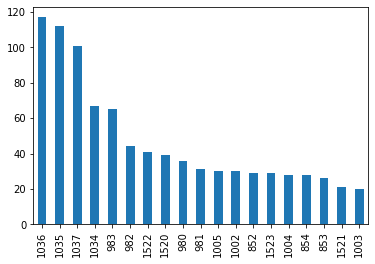

In [ ]:
# gráfico de barras:
df["LojaID"].value_counts(ascending=False).plot.bar()

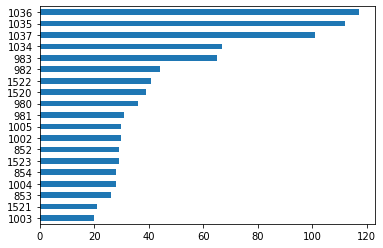

In [ ]:
#Grafico de barras horizontais:
df["LojaID"].value_counts(ascending=True).plot.barh()

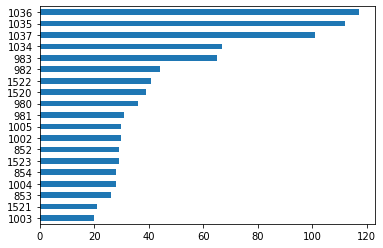

In [ ]:
#Grafico de barras horizontais: a linha acima do gráfico não aparece
df["LojaID"].value_counts(ascending=True).plot.barh();

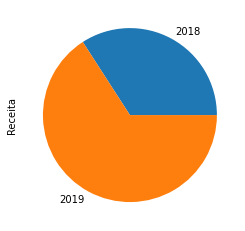

In [ ]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

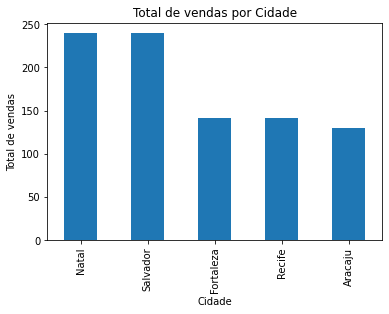

In [ ]:
#Adicionando titulo, eixos x e y de um grafico, importando biblioteca
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");


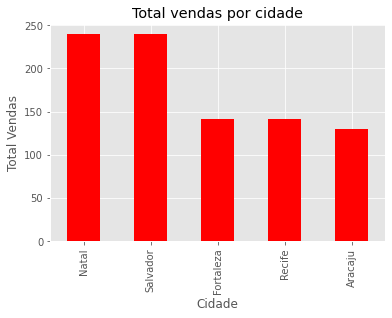

In [ ]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#alterar o estilo da tabela
plt.style.use('ggplot')

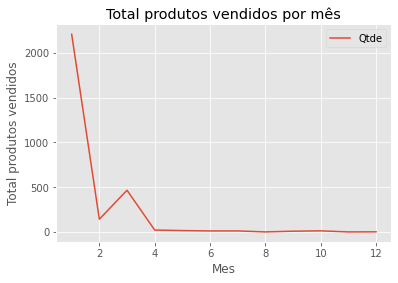

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos");
plt.legend()


In [ ]:
#soma da venda e quantidade qtde de produtos vendidos por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Total vendidos por mês
ano_19.groupby(ano_19["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

In [ ]:
#selecionando o mês 2019
ano_19 = df[df["Ano_venda"] == 2019]

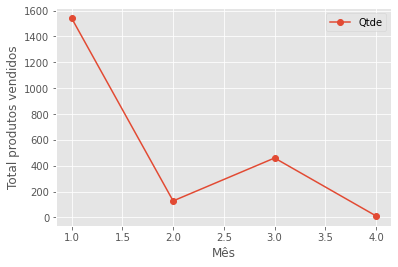

In [ ]:
#Total vendidos por mês
ano_19.groupby(ano_19["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();

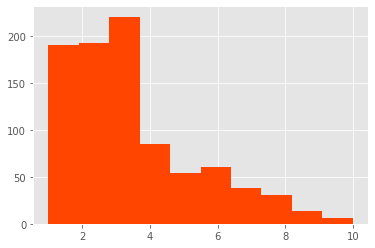

In [ ]:
# histograma
plt.hist(df["Qtde"], color='orangered');

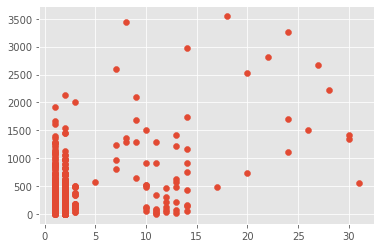

In [ ]:
plt.scatter(x=ano_19["dia_venda"], y=ano_19["Receita"]);

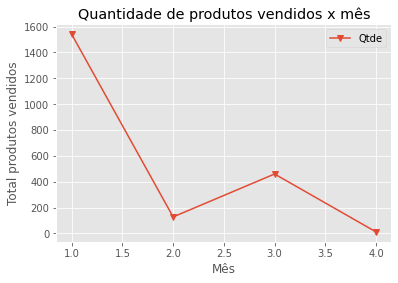

In [ ]:
#Salvando em png
ano_19.groupby(ano_19["mes_venda"])["Qtde"].sum().plot(marker = 'v')
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos");
plt.legend()
plt.savefig("grafico QTDE X MES.png")